#### RMSProp


The problem with adagrad is that the learning rate monotonically decreases, where at one point it becomes zero due to the aggresive squaring of gradients.


Extremely similar to adagrad, except instead of squared gradients it uses a exponentially moving average.


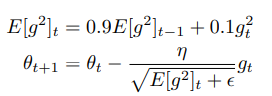

Hinton suggests γ to be set to 0.9, while a good default value for the learning rate η is 0.001.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(2024)

# Hyperparameters
n_embd = 10
n_hidden = 64
n_classes = 10
batch_size = 64
learning_rate = 0.01
num_epochs = 10


# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='D:/advanced_ml/01-backprop-by-hand/data', train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root='D:/advanced_ml/01-backprop-by-hand/data', train=False, download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

# Initialize weights as per your example
g = torch.Generator().manual_seed(2024)

model.fc1.weight.data = torch.randn((n_hidden, 28 * 28), generator=g) * 0.1
model.fc1.bias.data = torch.randn(n_hidden, generator=g) * 0.1

model.fc2.weight.data = torch.randn((n_classes, n_hidden), generator=g) * 0.1
model.fc2.bias.data = torch.randn(n_classes, generator=g) * 0.1

parameters = list(model.parameters())

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.90)

train_losses = []
epoch_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
        
        train_losses.append(loss.item())
    
    avg_loss = total_loss / len(train_loader)
    epoch_losses.append(avg_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}')
    print("-------------------------------")

Epoch 1/10, Batch 0/938, Loss: 3.5113
Epoch 1/10, Batch 100/938, Loss: 0.2938
Epoch 1/10, Batch 200/938, Loss: 0.3044
Epoch 1/10, Batch 300/938, Loss: 0.2202
Epoch 1/10, Batch 400/938, Loss: 0.1873
Epoch 1/10, Batch 500/938, Loss: 0.1641
Epoch 1/10, Batch 600/938, Loss: 0.3264
Epoch 1/10, Batch 700/938, Loss: 0.2990
Epoch 1/10, Batch 800/938, Loss: 0.4878
Epoch 1/10, Batch 900/938, Loss: 0.1994
Epoch 1/10, Average Loss: 0.3475
-------------------------------
Epoch 2/10, Batch 0/938, Loss: 0.2776
Epoch 2/10, Batch 100/938, Loss: 0.2147
Epoch 2/10, Batch 200/938, Loss: 0.0684
Epoch 2/10, Batch 300/938, Loss: 0.4663
Epoch 2/10, Batch 400/938, Loss: 0.1892
Epoch 2/10, Batch 500/938, Loss: 0.1999
Epoch 2/10, Batch 600/938, Loss: 0.1794
Epoch 2/10, Batch 700/938, Loss: 0.2790
Epoch 2/10, Batch 800/938, Loss: 0.2556
Epoch 2/10, Batch 900/938, Loss: 0.2968
Epoch 2/10, Average Loss: 0.2529
-------------------------------
Epoch 3/10, Batch 0/938, Loss: 0.0661
Epoch 3/10, Batch 100/938, Loss: 0.2

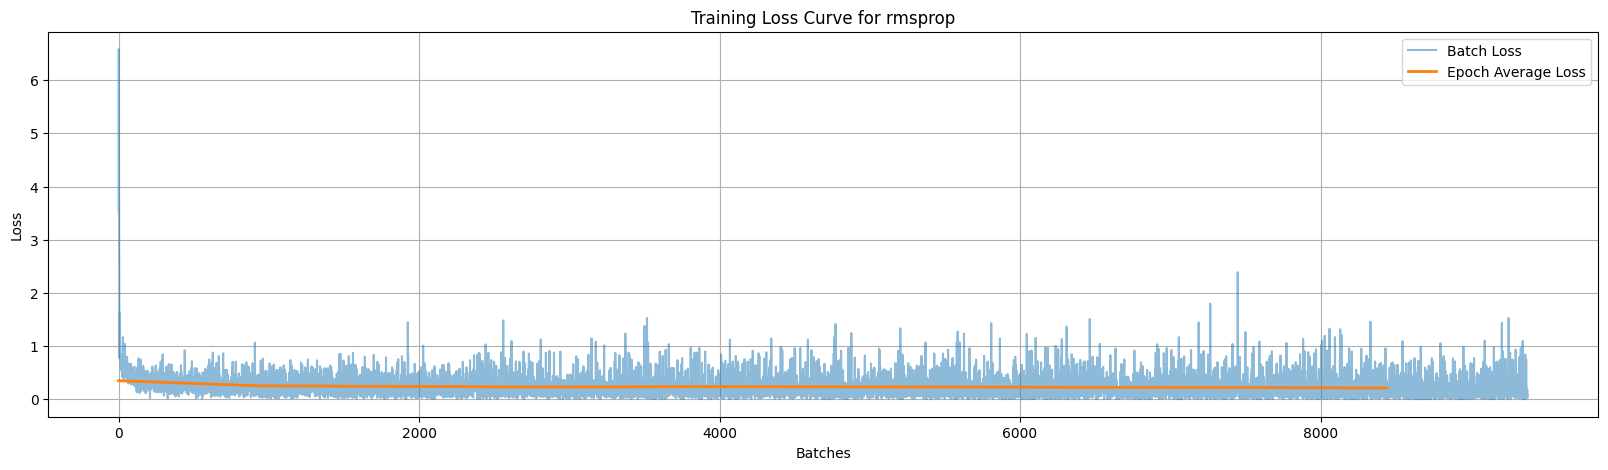

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.plot(train_losses, label='Batch Loss', alpha=0.5)
plt.plot(range(0, len(train_losses), len(train_loader)), epoch_losses, label='Epoch Average Loss', linewidth=2)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss Curve for rmsprop')
plt.legend()
plt.grid(True)